## Potato Disease Classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
dir = r"C:\Users\Priya Jain\Downloads\archive (5)\PLD_3_Classes_256\Training"
x=[]
y=[]
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x.append(image)
        y.append(direct)

Loading dataset training Early_Blight
Loading dataset training Healthy
Loading dataset training Late_Blight


In [3]:
dir_val = r"C:\Users\Priya Jain\Downloads\archive (5)\PLD_3_Classes_256\Validation"
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation Early_Blight
Loading dataset validation Healthy
Loading dataset validation Late_Blight


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
int_labels = le.fit_transform(y)
encode_label = np_utils.to_categorical(int_labels)

In [5]:
print(int_labels)

[0 0 0 ... 2 2 2]


In [6]:
print(encode_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
le = LabelEncoder()
int_labels = le.fit_transform(y_val)
encode_label_val = np_utils.to_categorical(int_labels)

In [8]:
x = np.array(x)

In [9]:
x_val = np.array(x_val)

In [10]:
from sklearn.utils import shuffle
x,encode_label = shuffle(x,encode_label)
x_val,encode_label_val = shuffle(x_val,encode_label_val)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,encode_label,test_size=0.2)

In [12]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
encode_label_val = np.array([np.array(i) for i in encode_label_val])

In [13]:
print(Y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [15]:
ops.reset_default_graph()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
from keras.callbacks import ModelCheckpoint
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [19]:
history=model.fit(X_train,Y_train,validation_data=(x_val,encode_label_val),batch_size=32,epochs=10,callbacks=callbacks)

Epoch 1/10
82/82 [==============================] - ETA: 0s - loss: 1.1438 - accuracy: 0.5600
Epoch 1: val_loss improved from inf to 1.07635, saving model to my_best_model.hdf5
82/82 [==============================] - 14s 146ms/step - loss: 1.1438 - accuracy: 0.5600 - val_loss: 1.0764 - val_accuracy: 0.3630
Epoch 2/10
81/82 [============================>.] - ETA: 0s - loss: 0.7349 - accuracy: 0.6620
Epoch 2: val_loss improved from 1.07635 to 0.97955, saving model to my_best_model.hdf5
82/82 [==============================] - 11s 137ms/step - loss: 0.7337 - accuracy: 0.6627 - val_loss: 0.9796 - val_accuracy: 0.5433
Epoch 3/10
82/82 [==============================] - ETA: 0s - loss: 0.5946 - accuracy: 0.7538
Epoch 3: val_loss improved from 0.97955 to 0.91981, saving model to my_best_model.hdf5
82/82 [==============================] - 11s 136ms/step - loss: 0.5946 - accuracy: 0.7538 - val_loss: 0.9198 - val_accuracy: 0.7308
Epoch 4/10
82/82 [==============================] - ETA: 0s - los

In [20]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


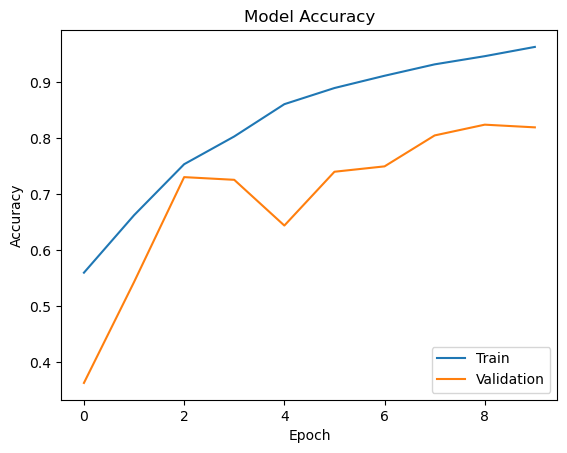

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

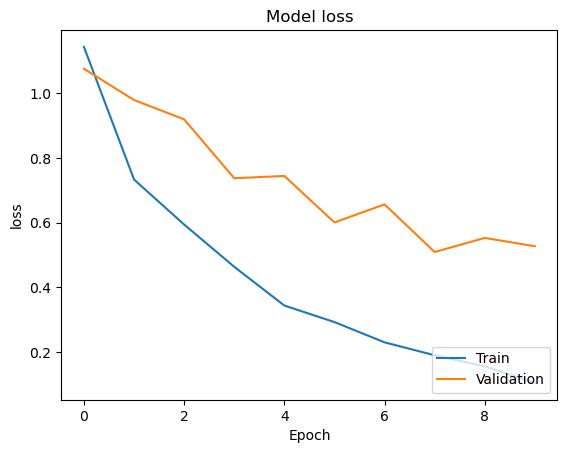

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

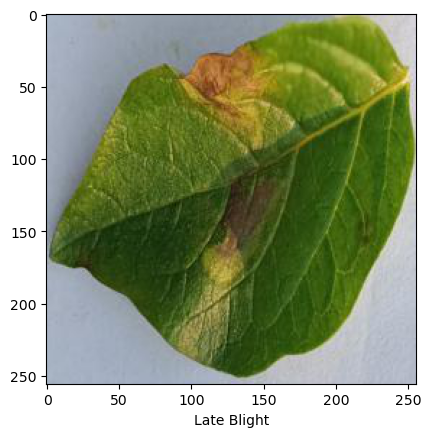

In [24]:
import matplotlib.image as mping
test_img_path = r"C:\Users\Priya Jain\Downloads\archive (5)\PLD_3_Classes_256\Testing\Late_Blight\Late_Blight_9.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Late Blight")
plt.show()

In [25]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)

In [26]:
print(test_arr)

[array([[[[0.77647059, 0.71372549, 0.66666667],
         [0.76862745, 0.70588235, 0.65882353],
         [0.75294118, 0.68627451, 0.65098039],
         ...,
         [0.76862745, 0.80392157, 0.81568627],
         [0.80784314, 0.80392157, 0.81176471],
         [0.84313725, 0.82352941, 0.83137255]],

        [[0.77254902, 0.70980392, 0.6627451 ],
         [0.76078431, 0.69803922, 0.65098039],
         [0.75294118, 0.68627451, 0.65098039],
         ...,
         [0.74117647, 0.79215686, 0.8       ],
         [0.79607843, 0.79215686, 0.8       ],
         [0.84705882, 0.82745098, 0.83529412]],

        [[0.76862745, 0.70196078, 0.66666667],
         [0.76078431, 0.69411765, 0.65882353],
         [0.73333333, 0.66666667, 0.63137255],
         ...,
         [0.18823529, 0.56470588, 0.51372549],
         [0.79215686, 0.79607843, 0.8       ],
         [0.84313725, 0.81568627, 0.82745098]],

        ...,

        [[0.76470588, 0.70196078, 0.65490196],
         [0.75686275, 0.69411765, 0.64705882

In [27]:
model.predict(test_arr) #From this we can conclude that the prediction shows the leaf hash Late Blight disease!!

1/1 [==============================] - 0s 219ms/step


array([[1.6023915e-03, 1.6982540e-07, 9.9839741e-01]], dtype=float32)